In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
data =pd.read_csv("data_car.csv")

# Understanding the dataset & Exploratory Data Analysis

In [3]:
data.shape

(11914, 16)

In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [12]:
data.dtypes.value_counts()

object     8
int64      5
float64    3
dtype: int64

In [13]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [14]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [16]:
data.duplicated().sum()

715

In [18]:
data=data.drop_duplicates()

In [19]:
data.duplicated().sum()

0

In [22]:
num_data=data.select_dtypes(include=['int64','float64'])
num_data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120
11910,2012,300.0,6.0,4.0,23,16,204,56670
11911,2012,300.0,6.0,4.0,23,16,204,50620
11912,2013,300.0,6.0,4.0,23,16,204,50920


In [21]:
cat_data=data.select_dtypes(include=['object'])
cat_data

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible
...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11910,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11911,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11912,Acura,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback


In [128]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [131]:
data['Engine Fuel Type'].value_counts()

regular unleaded                                6658
premium unleaded (required)                     1956
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150
electric                                          66
flex-fuel (premium unleaded required/E85)         53
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [135]:
data['Engine Fuel Type']=data['Engine Fuel Type'].fillna('regular unleaded')

In [136]:
data['Engine Fuel Type'].isna().sum()

0

In [137]:
data['Engine HP'].value_counts()

200.0    378
170.0    261
240.0    251
285.0    246
210.0    243
        ... 
661.0      1
660.0      1
573.0      1
151.0      1
572.0      1
Name: Engine HP, Length: 356, dtype: int64

In [144]:
data['Engine HP']=data['Engine HP'].fillna(data['Engine HP'].mode()[0])
data['Market Category']=data['Market Category'].fillna(data['Market Category'].mode()[0])
data['Number of Doors']=data['Number of Doors'].fillna(data['Number of Doors'].mode()[0])
data['Engine Cylinders']=data['Engine Cylinders'].fillna(data['Engine Cylinders'].mode()[0])

In [145]:
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

# Univariate Analysis

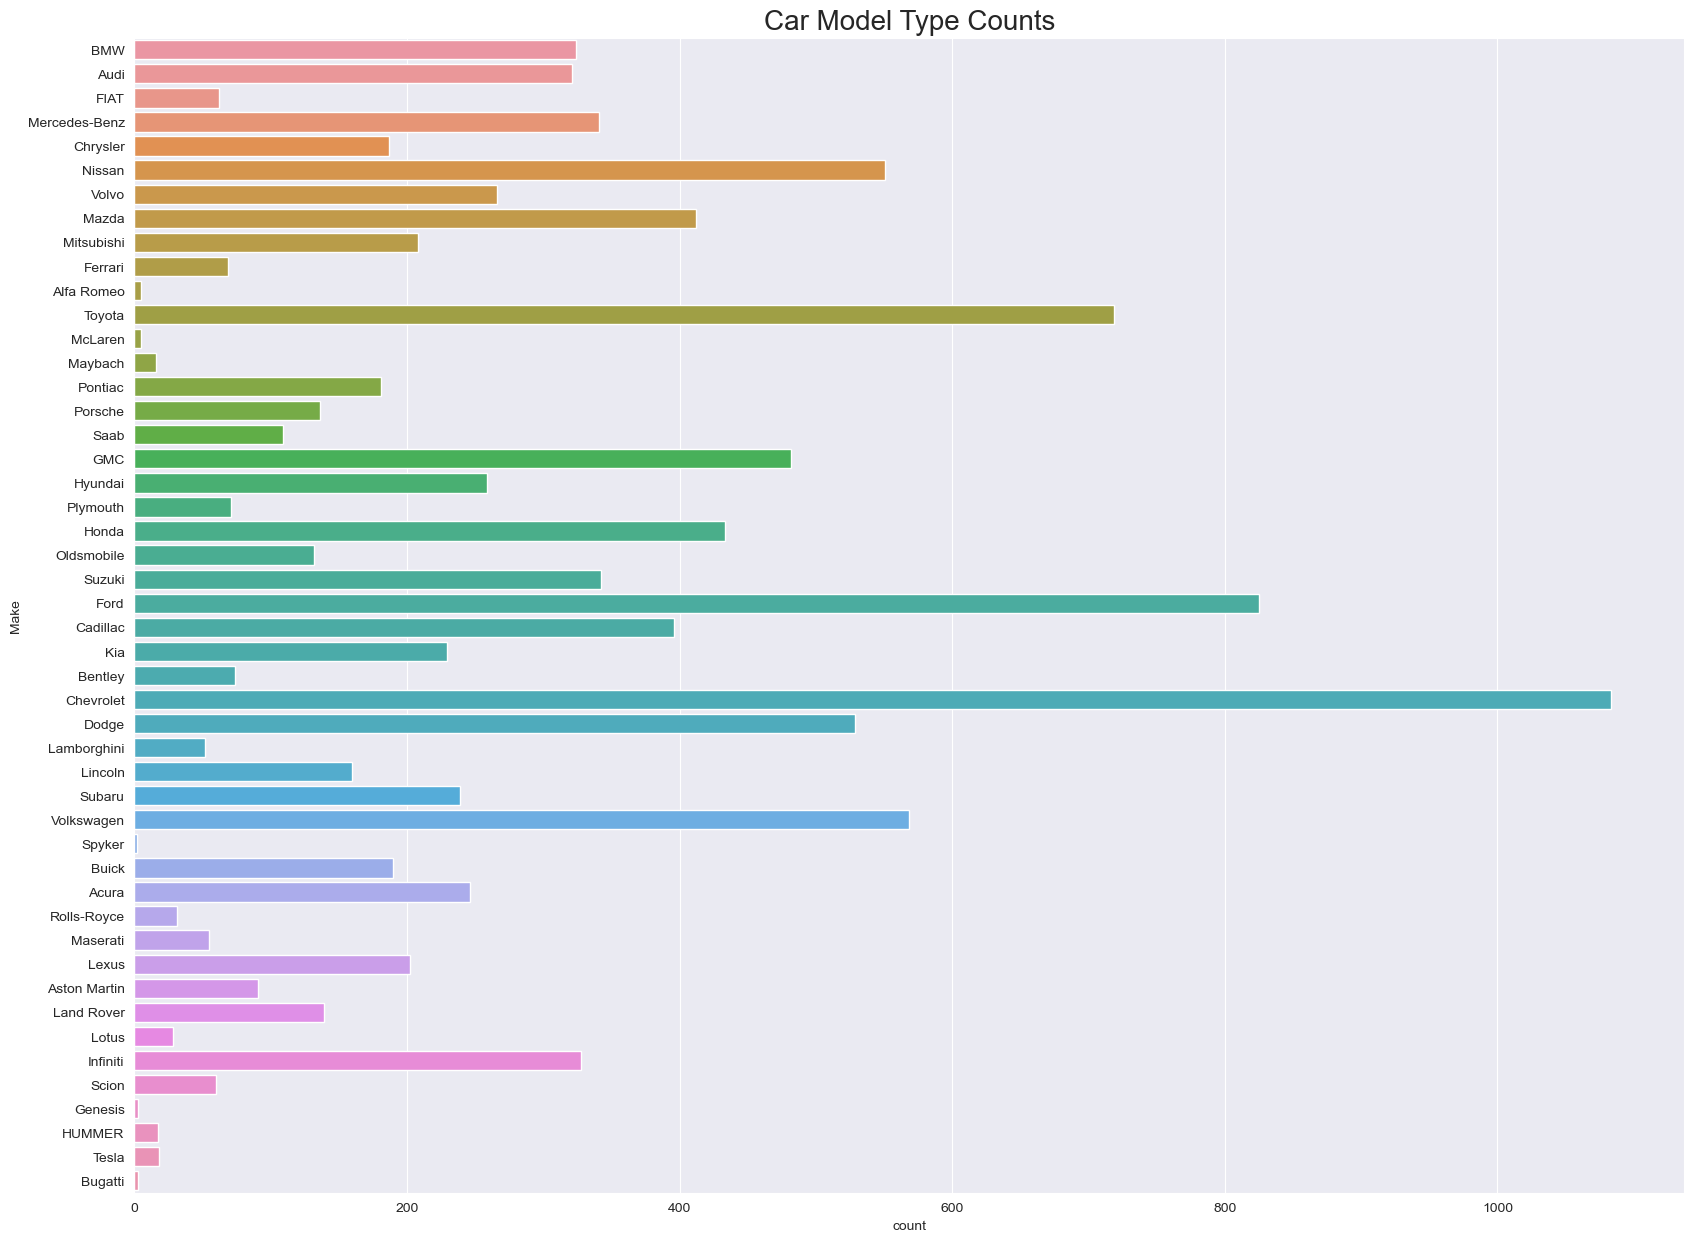

In [146]:
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Car Model Type Counts", fontsize = 20)
plt.show()

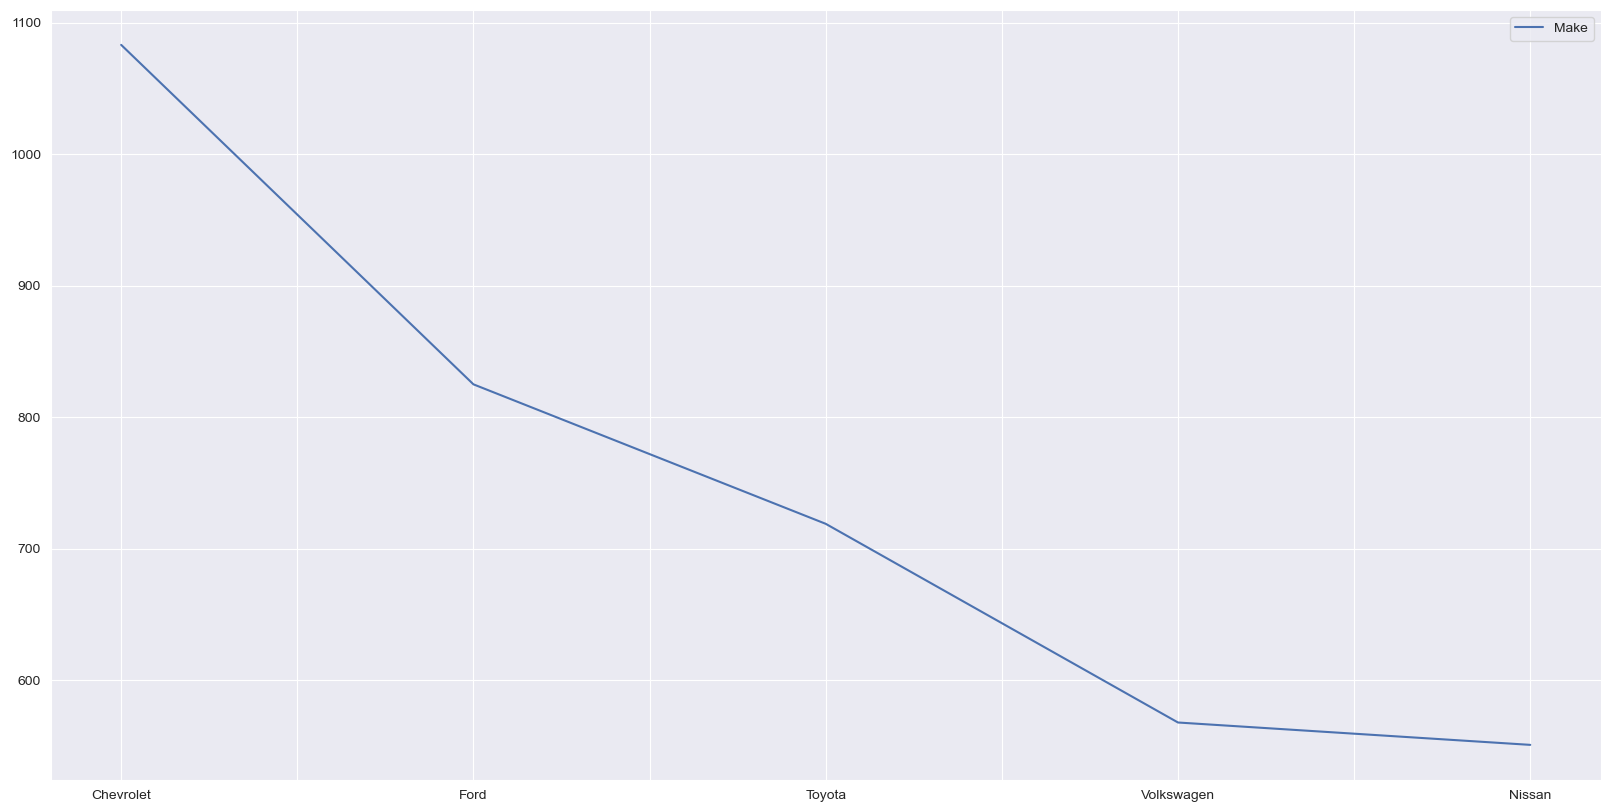

In [147]:
#Top 5 models
car=data['Make'].value_counts().head(5).to_frame().plot()

Observations:
Top 5 models are Chevrolet, Ford, Toyota, Volkswagen & Nissan


<Axes: xlabel='Vehicle Size', ylabel='count'>

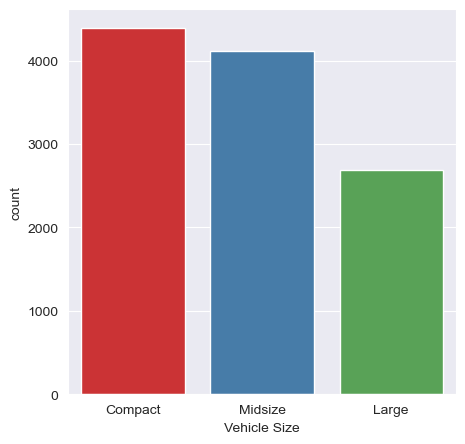

In [148]:
#Total Number of Cars based on Size 
plt.figure(figsize = (5, 5))
sns.countplot(x = 'Vehicle Size', data = data, palette = 'Set1')

It is seen that Compact cars are more in number compared those categories such as midsize and large segments. 
This is also reflective of the real-world where most of the cars are compact or midsize compared to a few models 
that are large in number. Therefore, the data is quite reflective of the real-world so that accurate predictions 
could be made on the test set.

<Axes: xlabel='count', ylabel='Year'>

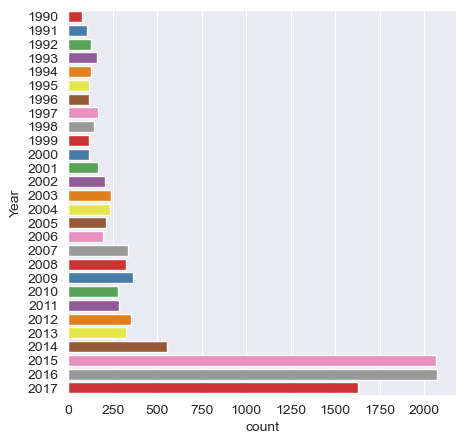

In [150]:
#Total Number of Cars based on Size 
plt.figure(figsize = (5, 5))
sns.countplot(y = 'Year', data = data, palette = 'Set1')

This is good as our data accounts for the most recent prices of the cars rather than relying on the significantly past data.



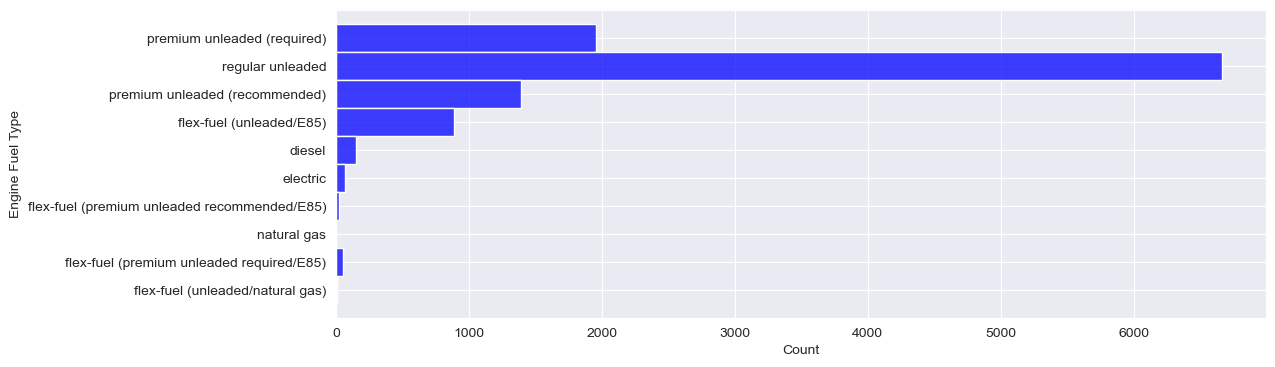

In [153]:
plt.figure(figsize=(12,4))
sns.histplot(y=data['Engine Fuel Type'],bins=50,color='blue' );

Text(0.5, 1.0, 'Vehicle Style wise split')

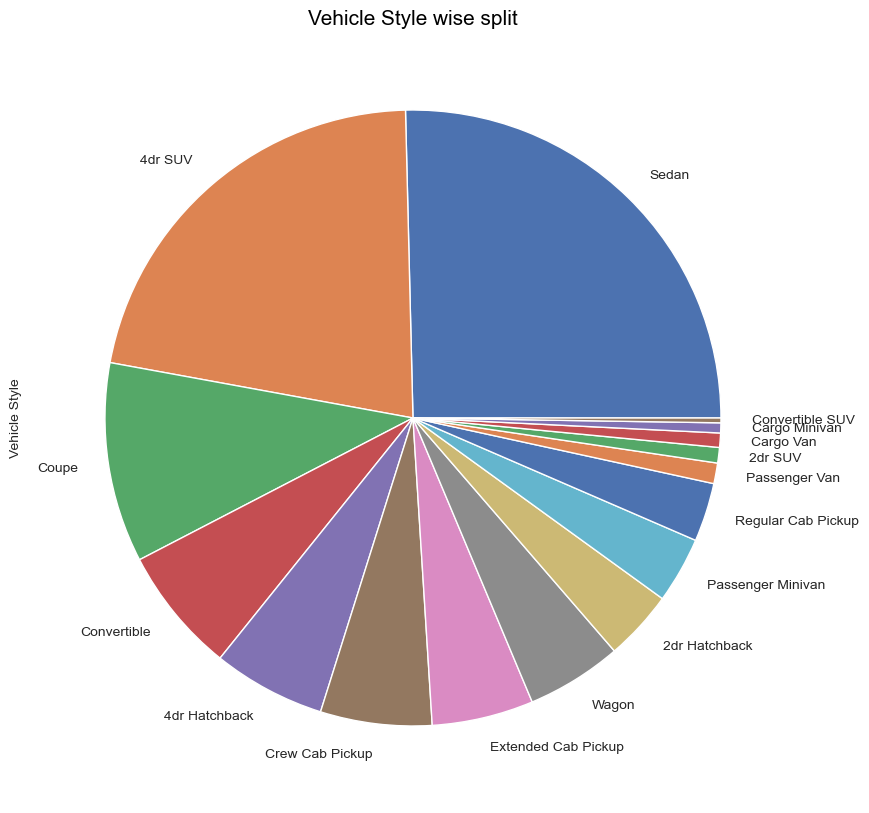

In [152]:
data['Vehicle Style'].value_counts().plot(kind="pie")
plt.title('Vehicle Style wise split',color='black',fontsize=15)

We can see Sedan, 4-wheel drive and coupe are in large numbers in this dataset

In [154]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

# Bivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Coupe'),
  Text(0, 1, 'Convertible'),
  Text(0, 2, 'Sedan'),
  Text(0, 3, 'Wagon'),
  Text(0, 4, '4dr Hatchback'),
  Text(0, 5, '2dr Hatchback'),
  Text(0, 6, '4dr SUV'),
  Text(0, 7, 'Passenger Minivan'),
  Text(0, 8, 'Cargo Minivan'),
  Text(0, 9, 'Crew Cab Pickup'),
  Text(0, 10, 'Regular Cab Pickup'),
  Text(0, 11, 'Extended Cab Pickup'),
  Text(0, 12, '2dr SUV'),
  Text(0, 13, 'Cargo Van'),
  Text(0, 14, 'Convertible SUV'),
  Text(0, 15, 'Passenger Van')])

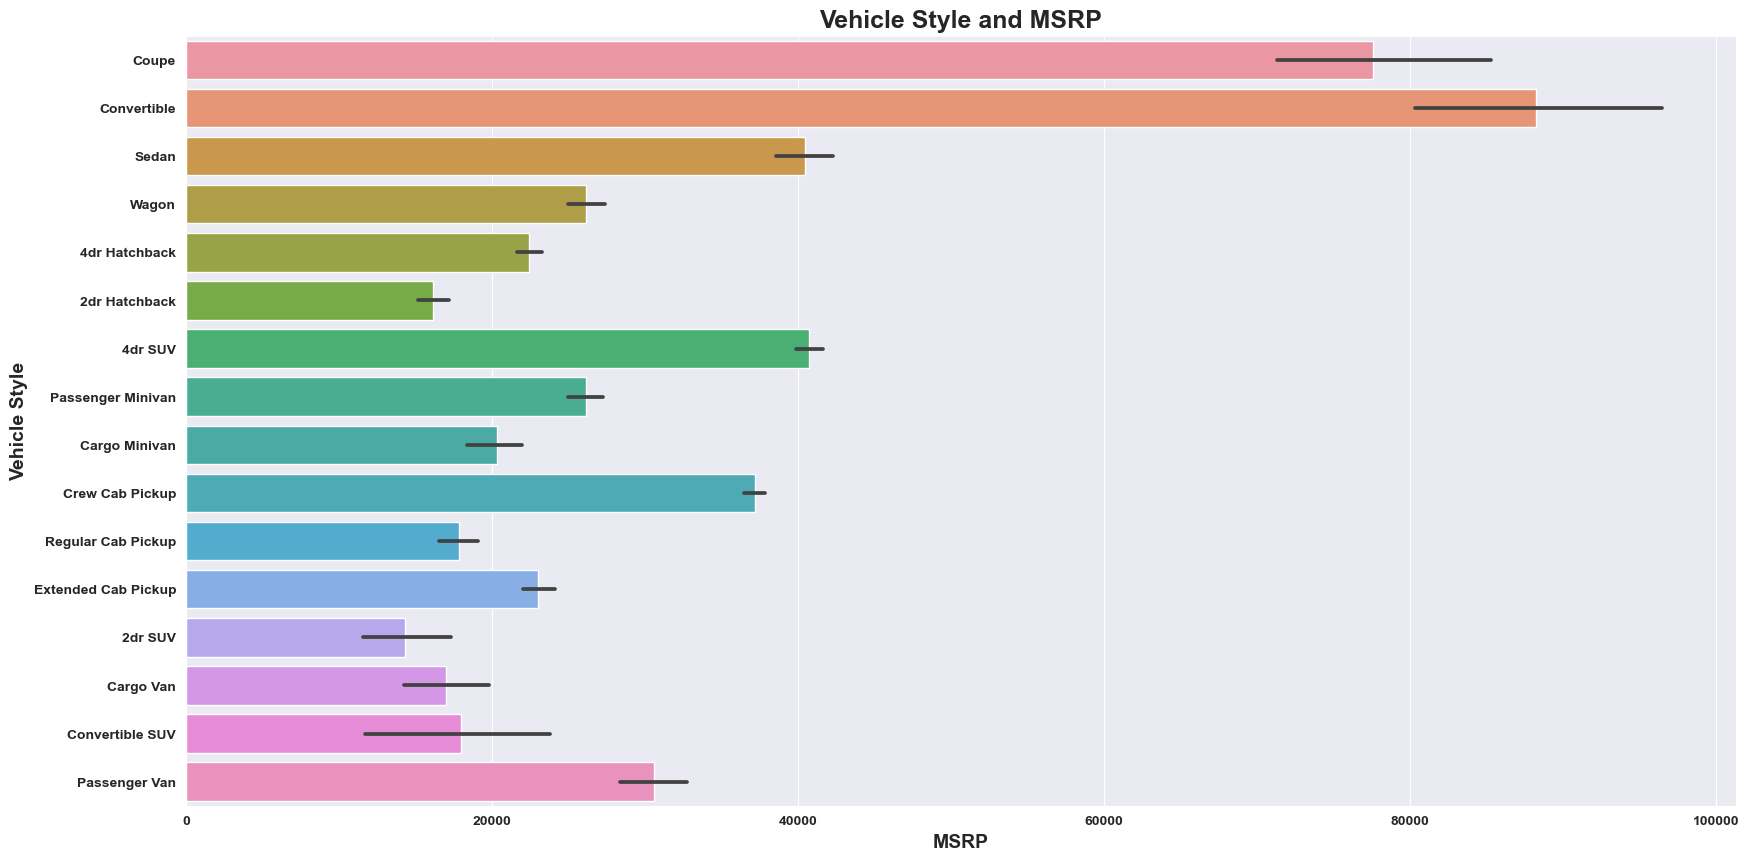

In [159]:
#Vehicle Style wise MSRP analysis

sns.set({'figure.figsize':(20,10)})
sns.barplot(x=data['MSRP'], y=data['Vehicle Style'])
plt.title('Vehicle Style and MSRP', weight='bold', fontsize=18)
plt.xlabel('MSRP', weight='bold',fontsize=14)
plt.ylabel('Vehicle Style', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

Coupe, Convertible, 4dr SUV and Sedan styles : Make the model worth more in terms of the manufacturer's suggested retail price (MSRP)

2 dr Suv, Cargo Van, Convertible SUV and 2 dr Hatchback : Make the model worth less in terms of the manufacturer's suggested retail price (MSRP)

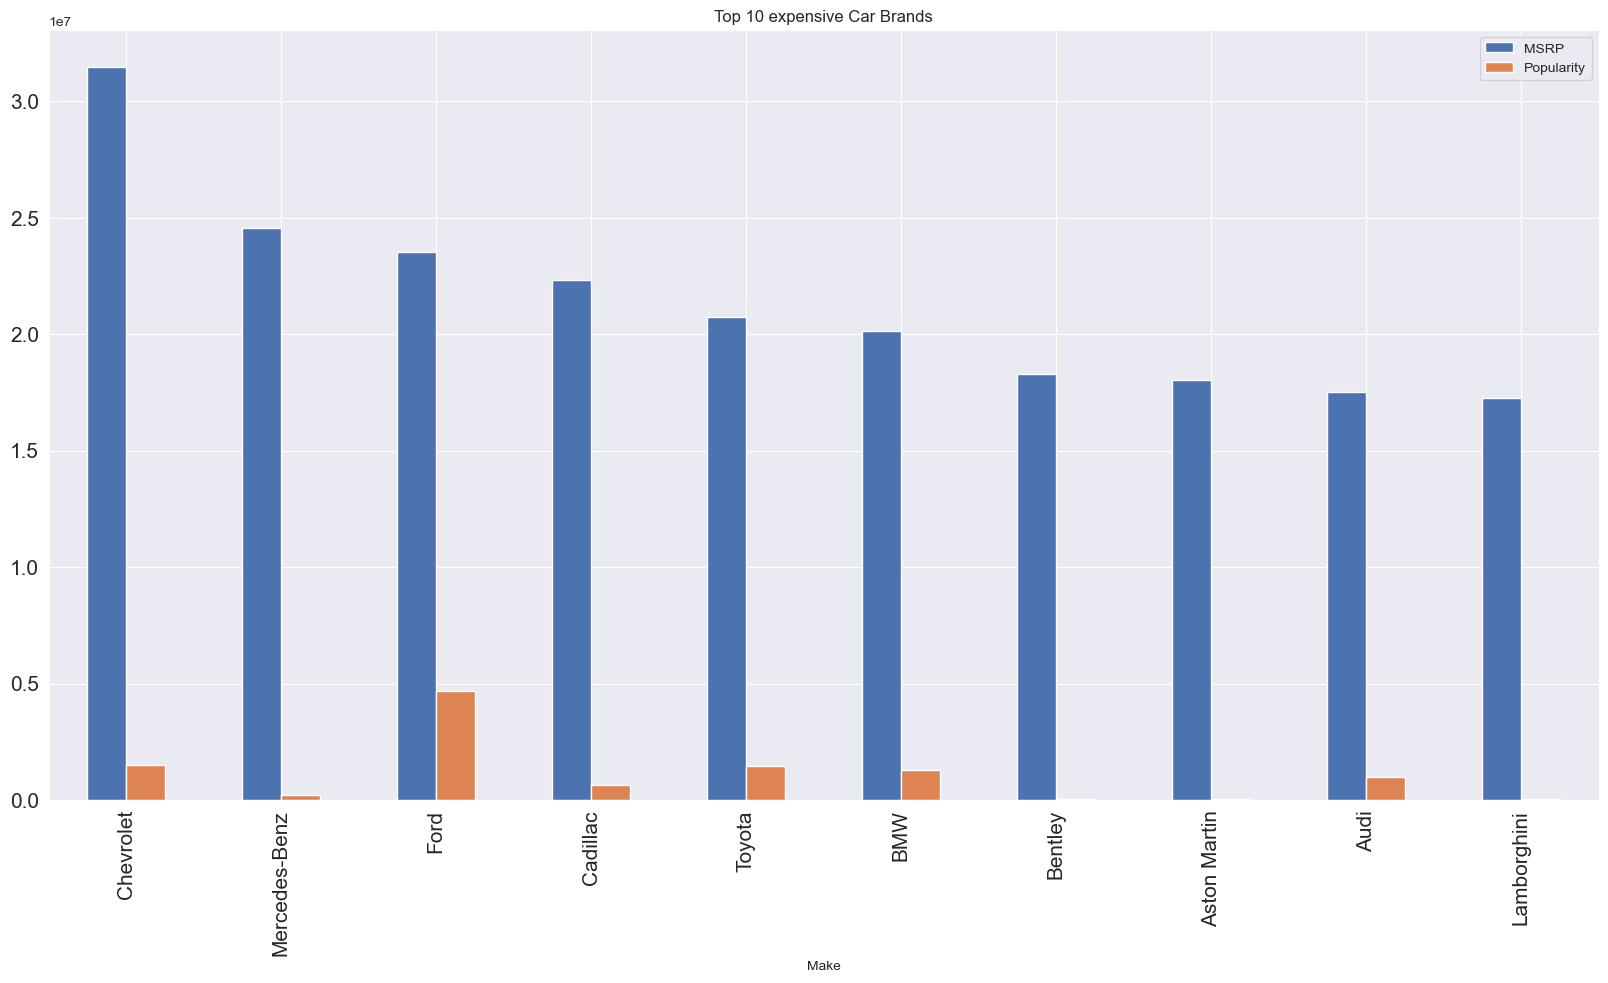

In [160]:
#Top 10 expensive Car Brands
modelp = data.groupby(['Make']).sum()[['MSRP','Popularity']].nlargest(10, 'MSRP').plot(kind='bar', title='Top 10 expensive Car Brands', fontsize=15)

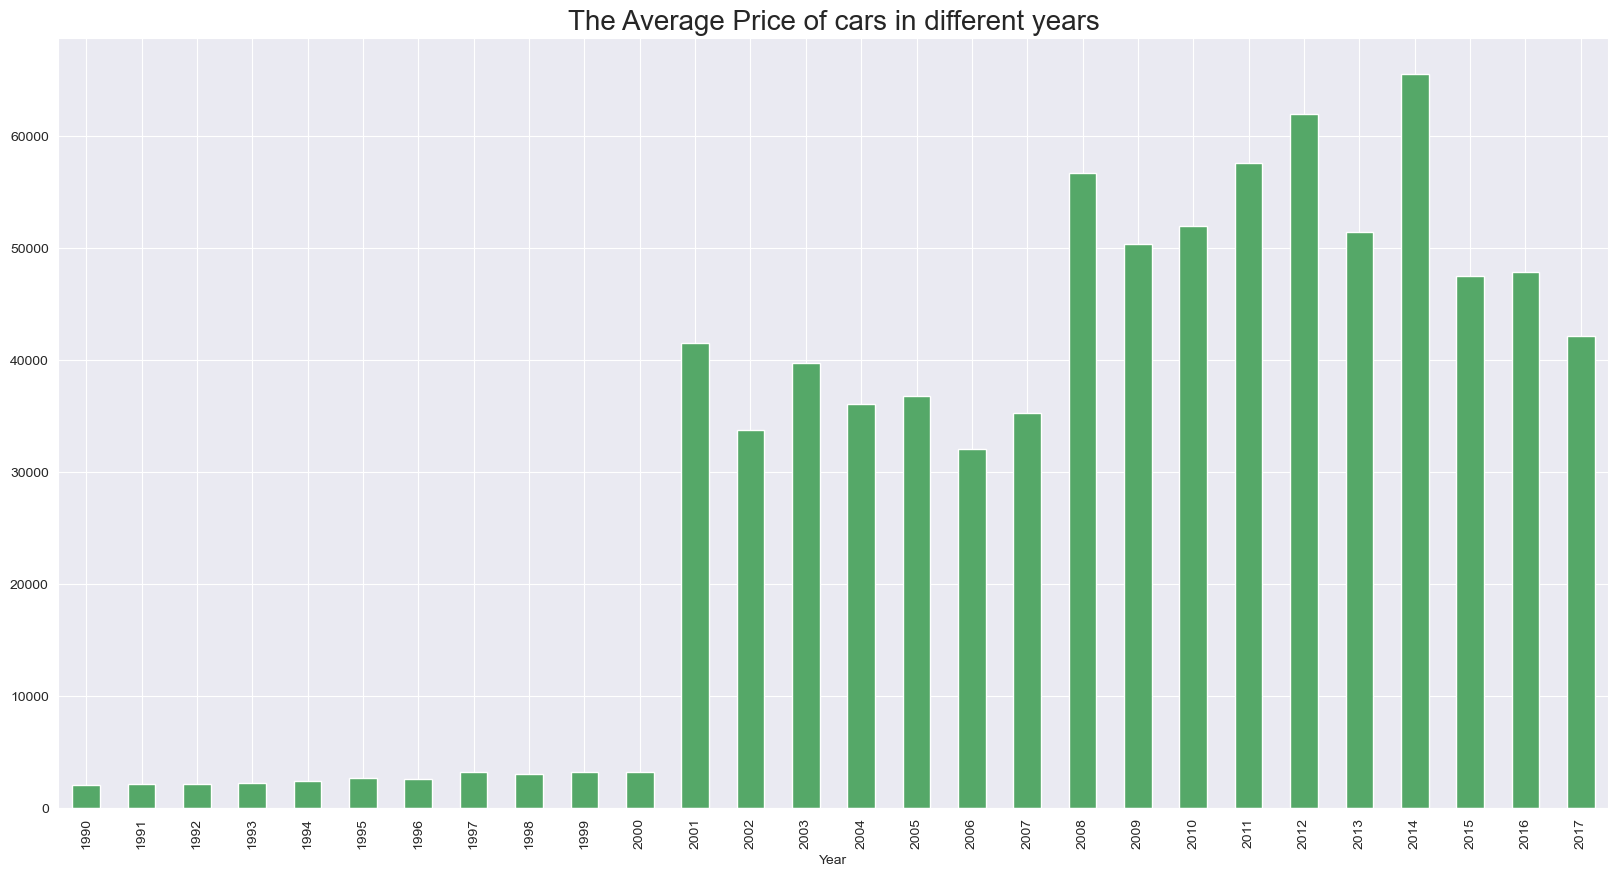

In [161]:
#The Average Price of cars in different years
plt.figure(figsize = (20, 10))
data.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

In our case, we have grouped the cars based on the years of manufacture and then took the average price of the cars after grouping them. 
We see that as the years progress, there is a steady average increase in the prices of cars from our data respectively.

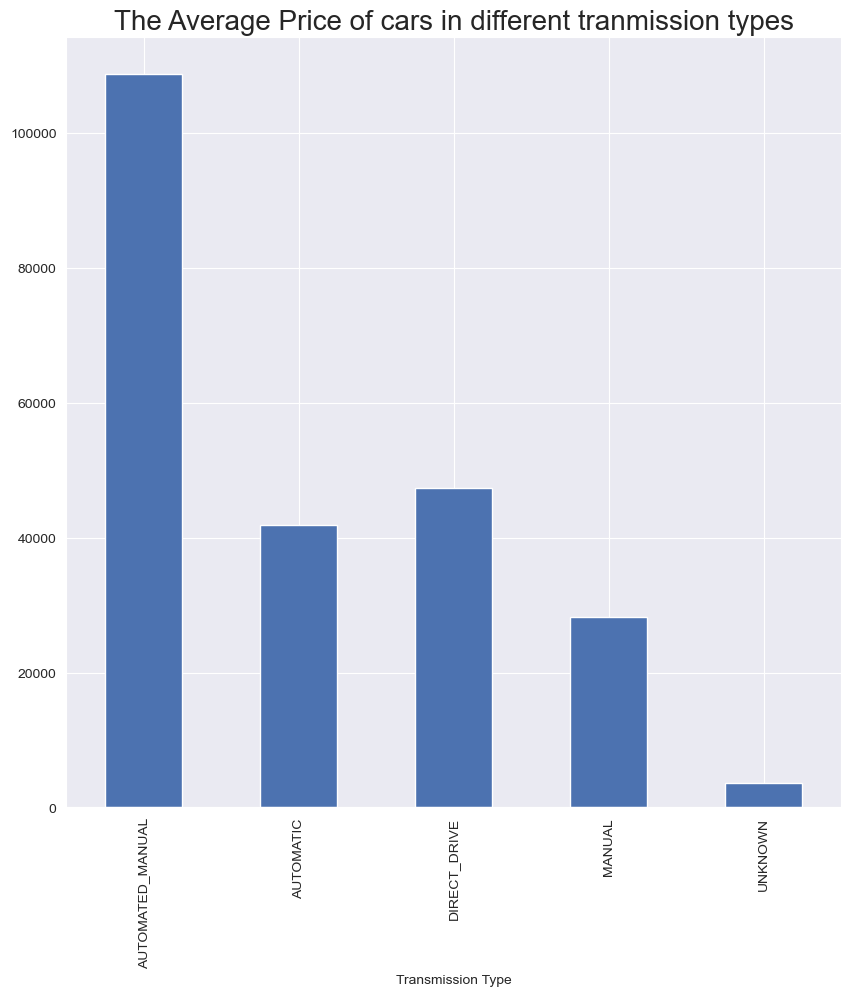

In [162]:
#The Average Price of cars in different tranmission types
plt.figure(figsize = (10, 10))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'b')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.show()

Cars that are both automatic and manual are considerably higher in terms of prices compared to the others. We also know that usually manual cars cost less compared to their automatic counterparts. That is being reflected in our data as well.

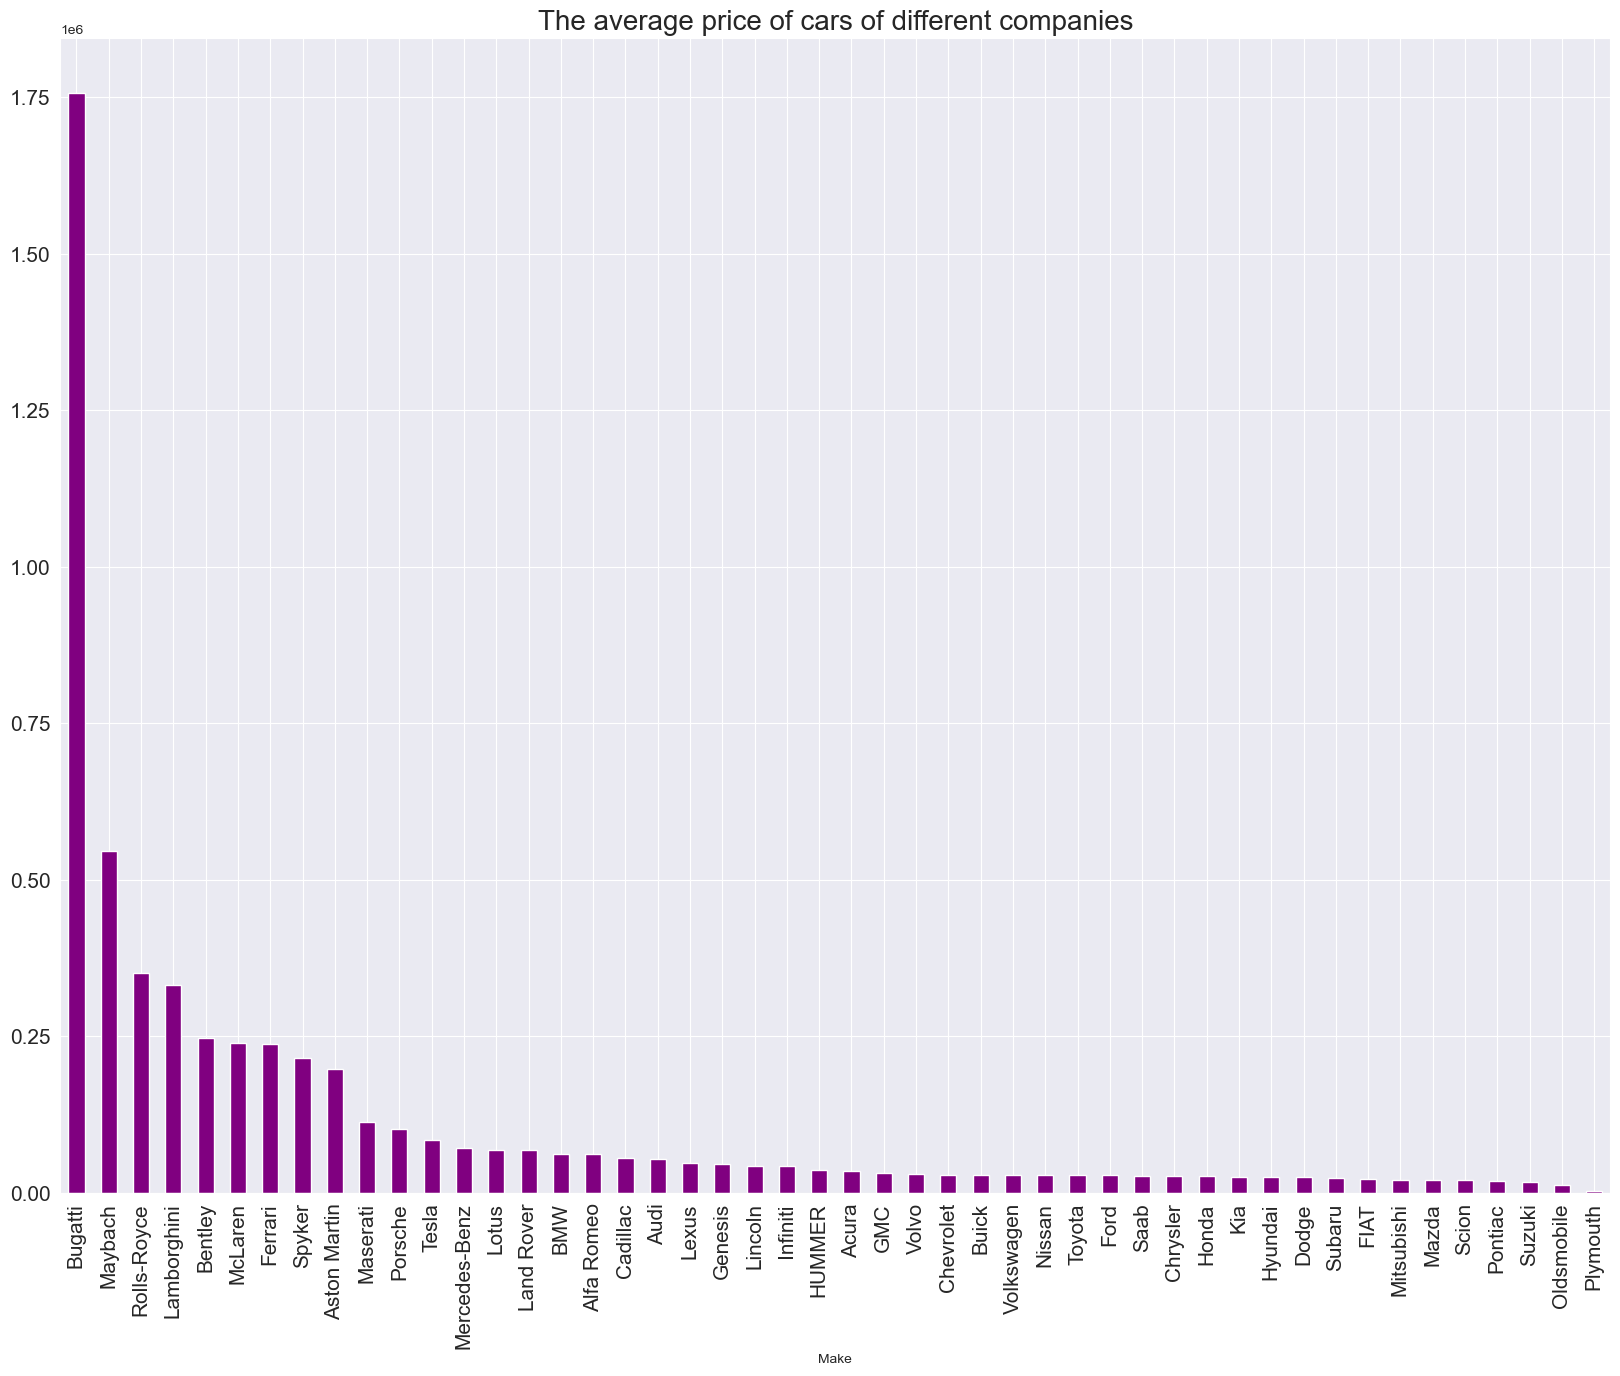

In [164]:
#The average price of cars of different companies
plt.figure(figsize = (20, 15))
data.groupby(['Make']).mean()['MSRP'].sort_values(ascending = False).plot(kind = 'bar', fontsize = 15, color = 'purple')
plt.title("The average price of cars of different companies", fontsize = 20)
plt.show()

It could clearly be seen that the manufacturer ‘Bugatti’ has significantly higher prices than other manufacturers combined. There are other companies that are close to the price range of Bugatti manufacturers. 

In [165]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             357
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

# Multivariate analysis

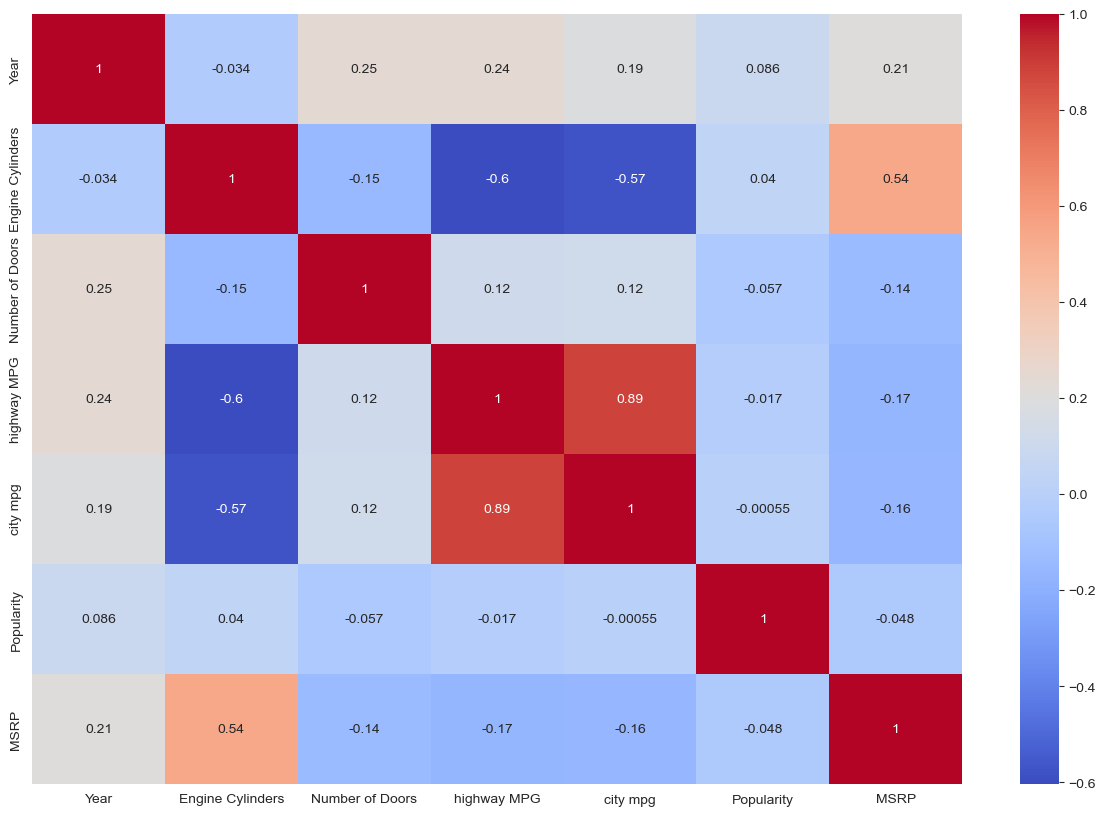

In [166]:
correlation=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()

In [167]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Managing Outliers

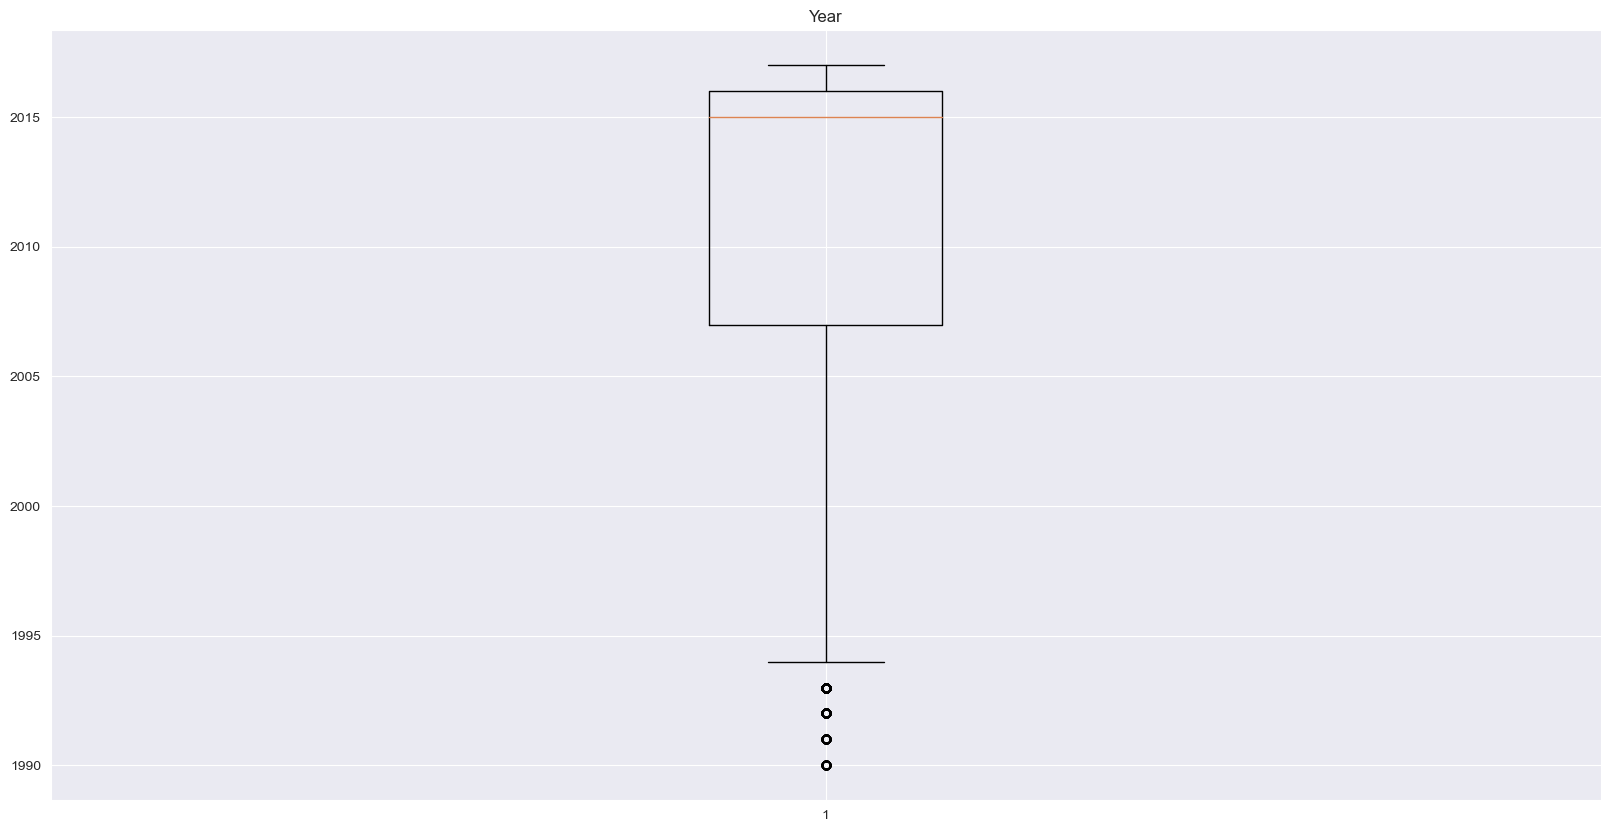

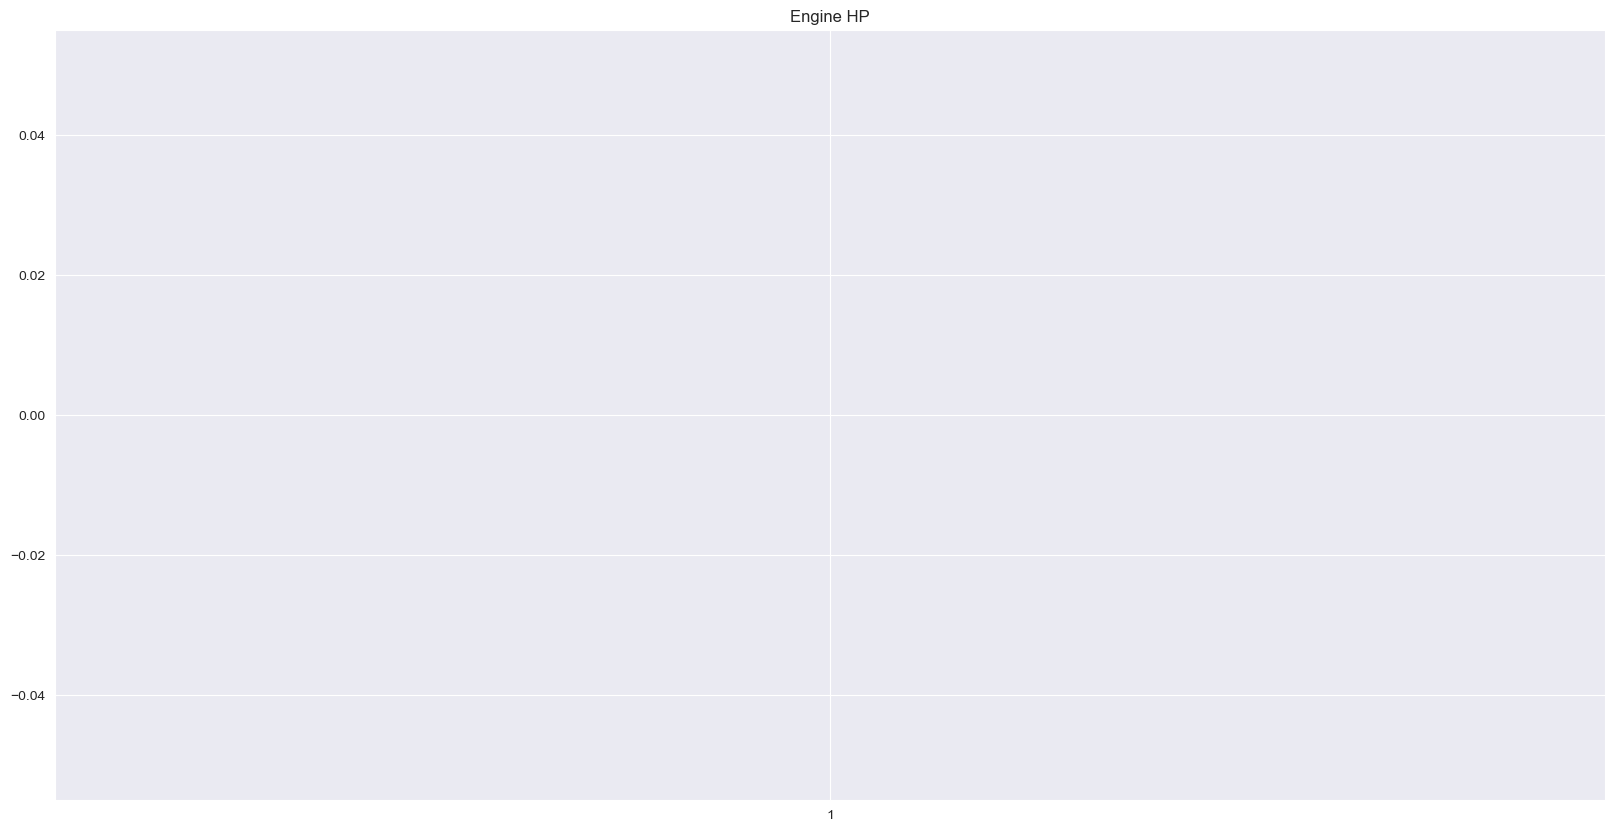

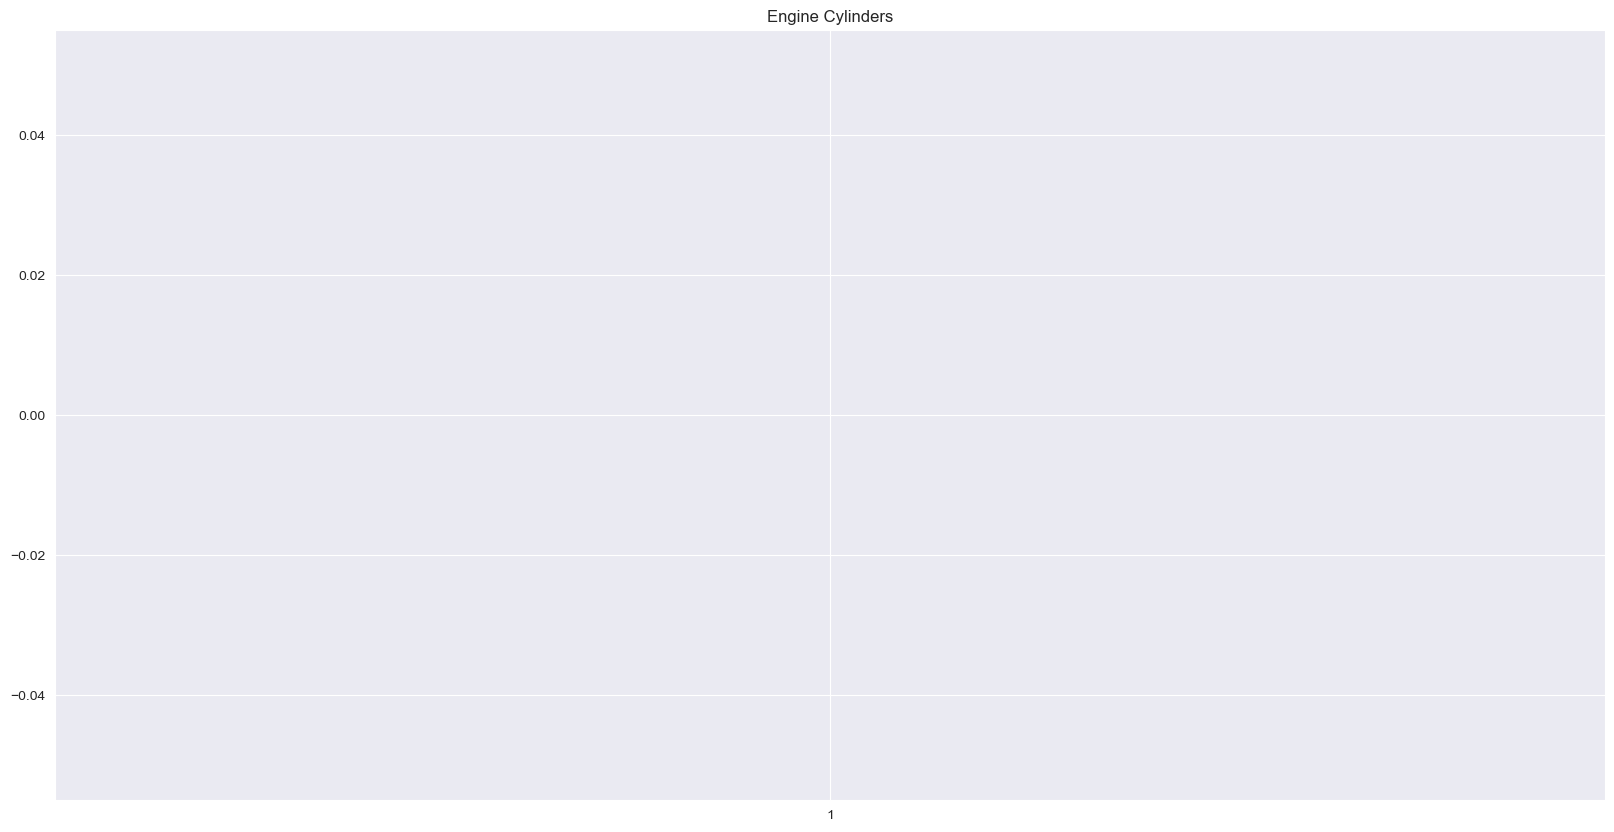

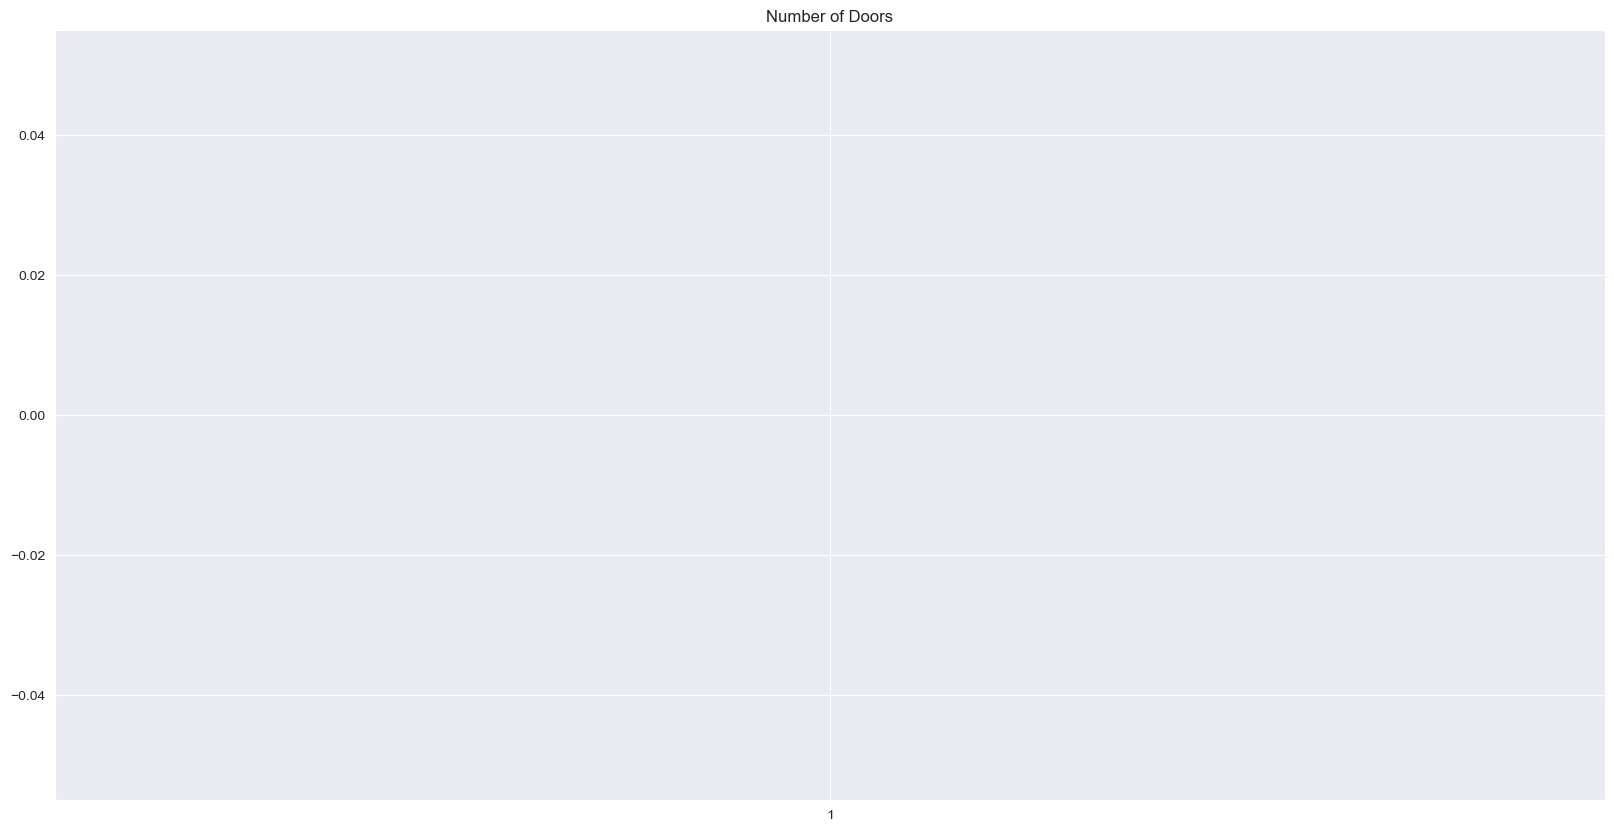

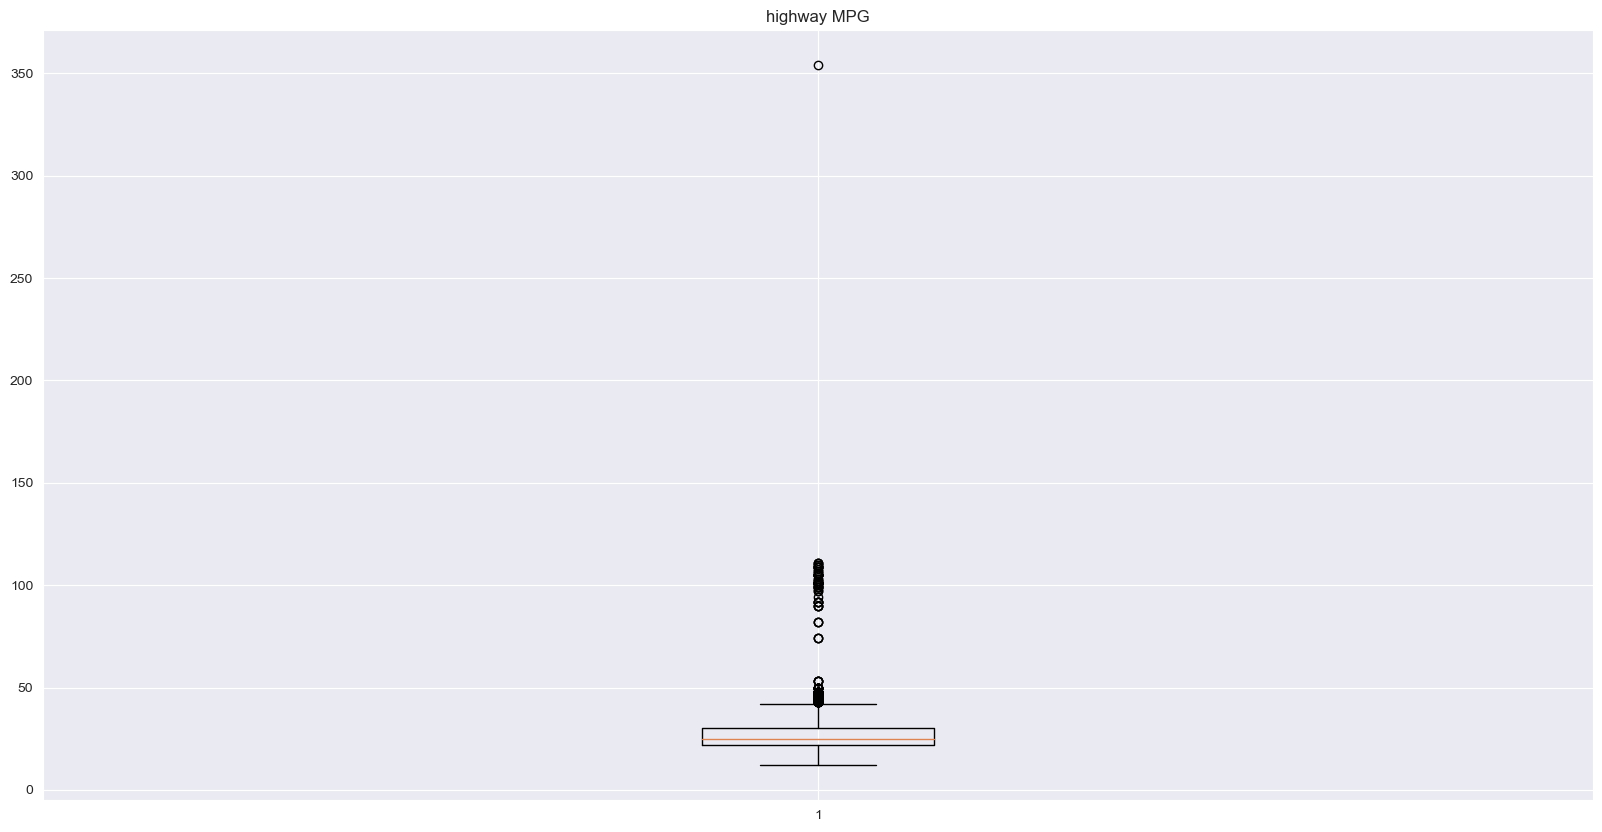

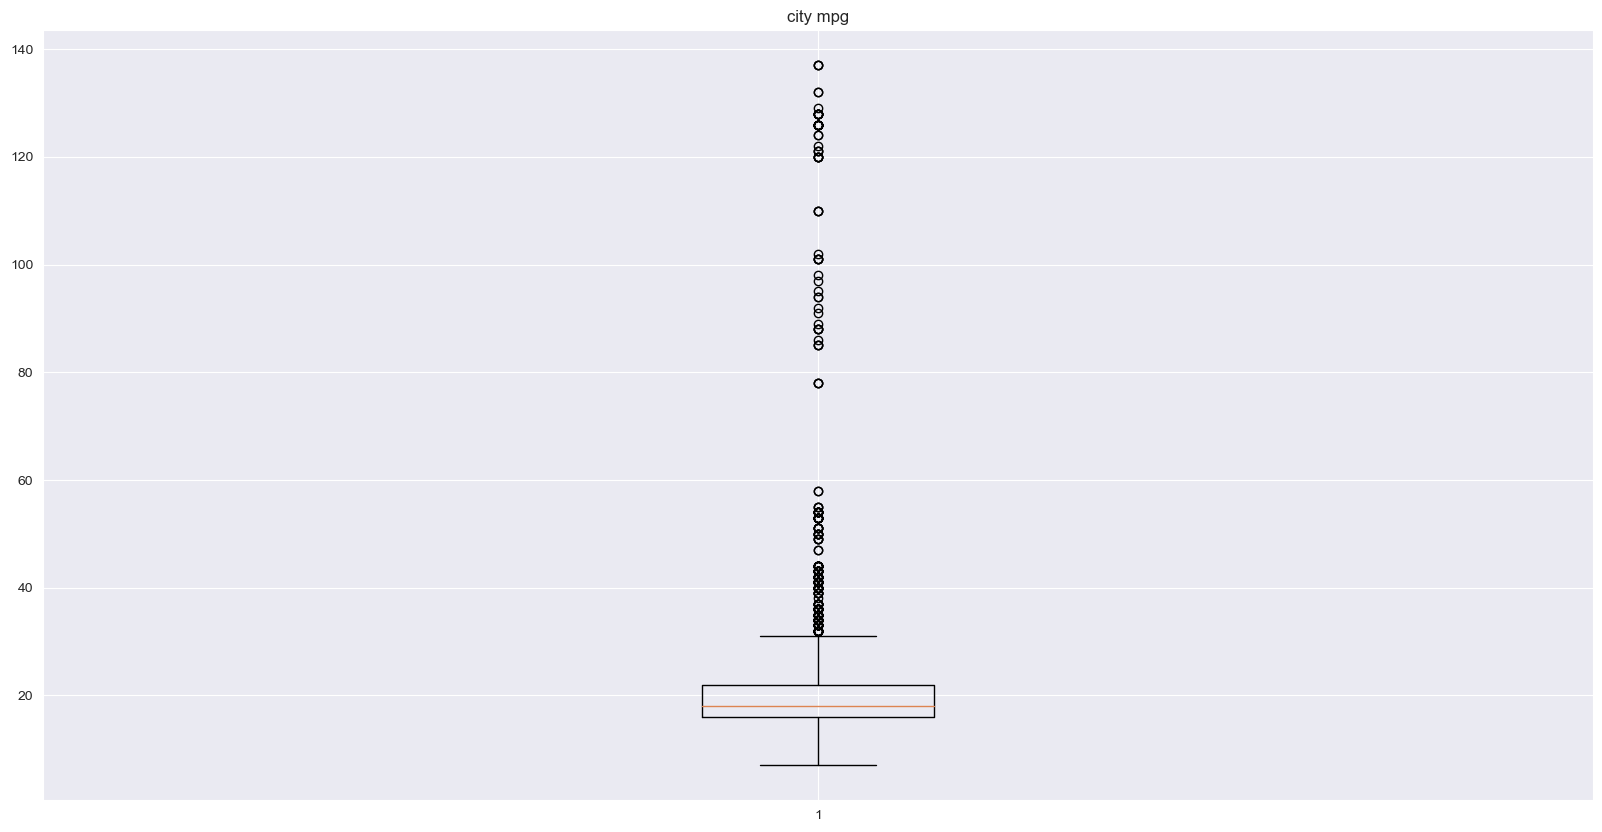

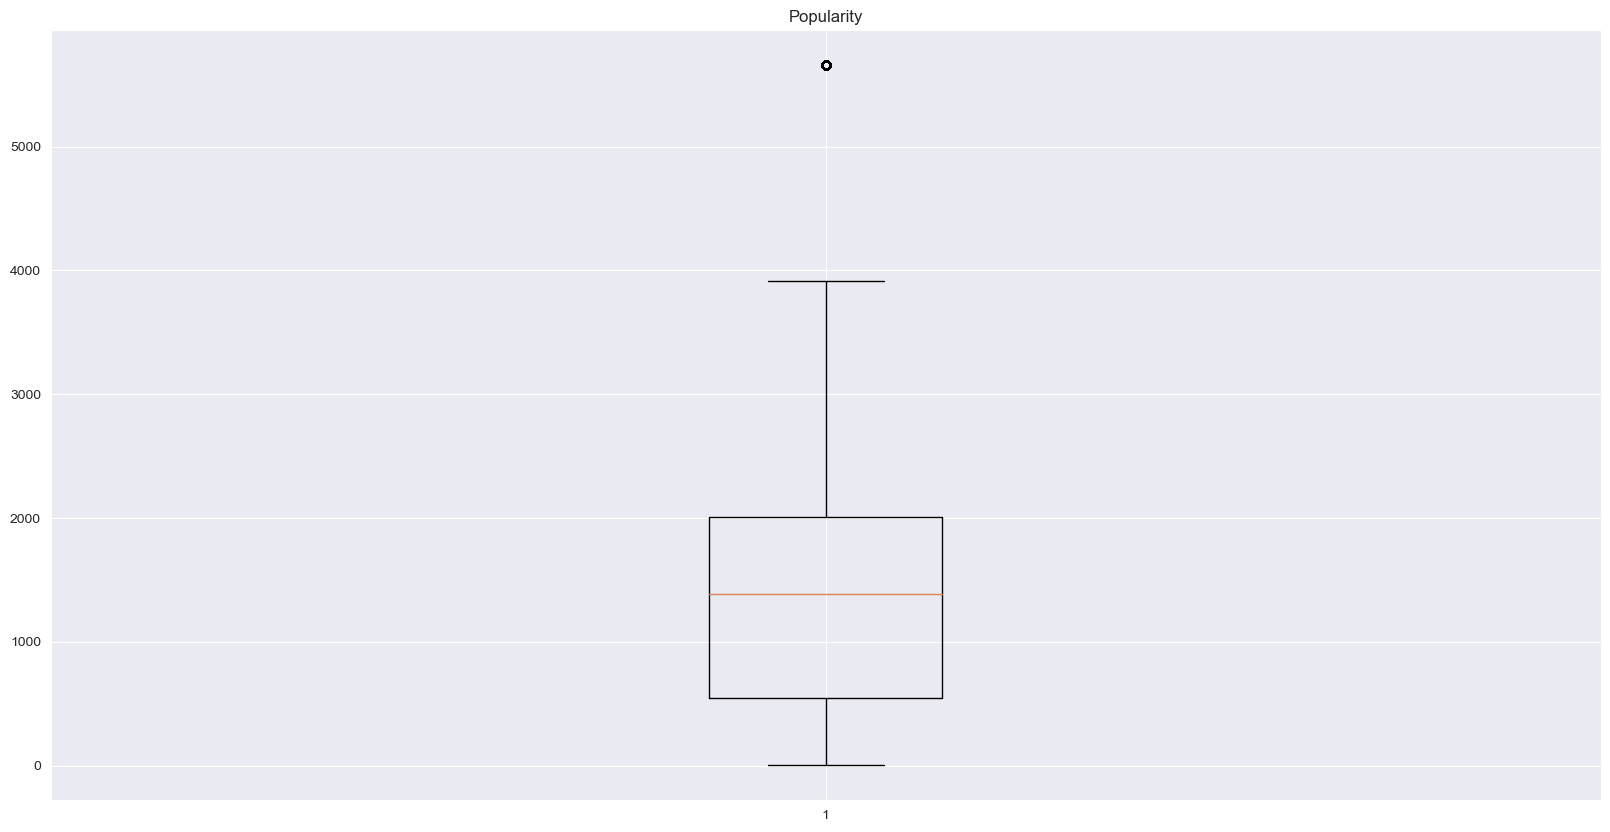

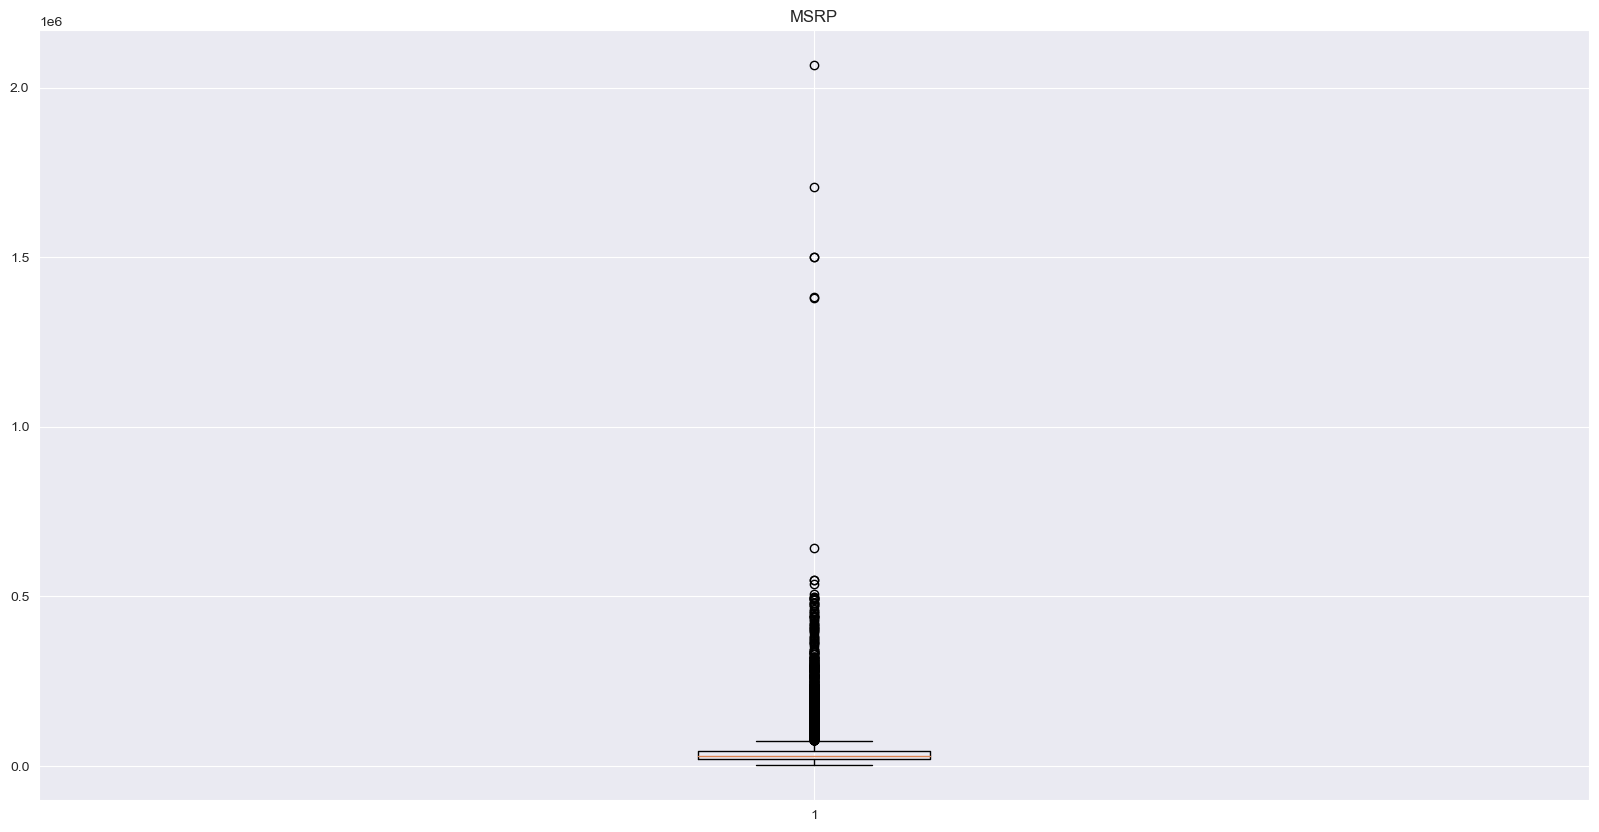

In [191]:
for i in ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP']:
    plt.figure()
    plt.boxplot(num_data[i])
    plt.title(i)

In [193]:
num_data.columns
new_data=data
new_data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [194]:
for i in['highway MPG', 'city mpg', 'Popularity', 'MSRP']: 
    q1=np.percentile(new_data[i],25,interpolation='midpoint')
    q2=np.percentile(new_data[i],50,interpolation='midpoint')
    q3=np.percentile(new_data[i],75,interpolation='midpoint')
    iqr=q3-q1
    min_limit=q1-1.5*iqr
    max_limit=q3+1.5*iqr
    outlier=[]
    for x in new_data[i]:
        if((x>max_limit) or (x<min_limit)):
            outlier.append(x)
    print(outlier)
    new_data.loc[new_data[i]>max_limit,i]=np.median(new_data[i])
    new_data.loc[new_data[i]<min_limit,i]=np.median(new_data[i])
    print("Outliers in ",i," column is removed")

[]
Outliers in  highway MPG  column is removed
[29, 29, 29, 29, 29, 29, 31, 31, 30, 30, 30, 30, 30, 29, 29, 30, 30, 29, 30, 30, 29, 29, 30, 29, 29, 30, 29, 30, 29, 30, 30, 30, 29, 30, 30, 29, 29, 29, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 8, 8, 31, 31, 31, 31, 31, 31, 31, 31, 31, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 30, 29, 30, 31, 30, 30, 30, 30, 29, 29, 29, 30, 31, 31, 31, 31, 31, 31, 31, 30, 31, 31, 31, 31, 31, 30, 30, 30, 31, 31, 31, 30, 31, 31, 31, 31, 30, 31, 31, 31, 31, 30, 30, 30, 29, 30, 29, 29, 29, 29, 30, 29, 30, 29, 29, 29, 29, 30, 29, 30, 29, 29, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 29, 29, 30, 29, 30, 29, 30, 29, 30, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 29, 29, 7, 29, 29, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 30, 29, 29, 31, 31, 31, 31, 31, 31, 31, 31, 30, 31, 30, 30, 29, 29, 29, 31, 30, 29, 29, 29, 30, 30, 29, 30, 29, 29, 30, 30, 29, 29, 30, 30, 29, 30, 31, 31, 31, 31, 31,

# One-hot encoding

In [195]:
{column: len(new_data[column].unique()) for column in new_data.columns if data.dtypes[column]=='object'}

{'Make': 48,
 'Model': 915,
 'Engine Fuel Type': 10,
 'Engine HP': 357,
 'Transmission Type': 5,
 'Driven_Wheels': 4,
 'Market Category': 71,
 'Vehicle Size': 3,
 'Vehicle Style': 16}

In [196]:
#cloning the dataset to another instance fpr back-up
car=new_data
car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,1385,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,1385,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,1385,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,1385,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,1385,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [197]:
def onehot_encode(car, columns,prefixes):
    car=car.copy()
    for columns, prefix in zip(columns,prefixes):
        dummies = pd.get_dummies(car[columns],prefix=prefix)
        car=pd.concat([car,dummies], axis=1)
        car=car.drop(columns,axis=1)
        
    return car

In [198]:
car=onehot_encode(
  car,
  ['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style'],
  ['Make','Model','Fuel','Trans','Wheels','Market','Size','Style']
)

In [199]:
car.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,...,Style_Convertible,Style_Convertible SUV,Style_Coupe,Style_Crew Cab Pickup,Style_Extended Cab Pickup,Style_Passenger Minivan,Style_Passenger Van,Style_Regular Cab Pickup,Style_Sedan,Style_Wagon
0,2011,335.0,6.0,2.0,26,19,1385,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,1385,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,1385,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,1385,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,1385,34500,0,0,...,1,0,0,0,0,0,0,0,0,0


In [200]:
car.shape

(11199, 1080)

In [202]:
new_data.shape

(11199, 16)

In [204]:
car.describe()

,Year,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,...,Style_Convertible,Style_Convertible SUV,Style_Coupe,Style_Crew Cab Pickup,Style_Extended Cab Pickup,Style_Passenger Minivan,Style_Passenger Van,Style_Regular Cab Pickup,Style_Sedan,Style_Wagon
count,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,...,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000
mean,2011.682293,5.661488,3.454416,25.926422,18.326636,1170.551924,28455.824091,0.021966,0.000446,0.008126,...,0.066167,0.002500,0.104920,0.058487,0.053308,0.034735,0.010805,0.030806,0.253862,0.050183
std,6.090565,1.796677,0.872804,5.901188,3.982942,737.678934,13585.378772,0.146580,0.021126,0.089780,...,0.248584,0.049942,0.306464,0.234673,0.224658,0.183117,0.103386,0.172800,0.435239,0.218332
min,1994.000000,0.000000,2.000000,12.000000,9.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,4.000000,2.000000,22.000000,16.000000,549.000000,21599.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,30675.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,4.000000,30.000000,21.000000,1720.000000,36100.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2017.000000,16.000000,4.000000,42.000000,28.000000,3105.000000,62070.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#  Scaling and splitting

In [205]:
X=car.drop('MSRP',axis=1)

In [206]:
y=car.loc[:,'MSRP']

In [209]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=34)

# Model Building

In [212]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score

In [215]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


In [216]:
mse_lin_reg = mean_squared_error(y_test, y_predict)
R2_lin_reg = r2_score(y_test, y_predict)
print("Mean squared error of linear regression: ", mse_lin_reg)
print("R2_score of linear regression: ", R2_lin_reg)

Mean squared error of linear regression:  6.756198584366547e+33
R2_score of linear regression:  -3.6969759819826104e+25


In [217]:
model_Gr = GradientBoostingRegressor()
model_Gr.fit(X_train, y_train)
y_predict_Gr = model_Gr.predict(X_test)

In [219]:
model_Gr.score(X_test,y_test)

0.8298588412344856

Here Gradient Boosting Resgression model is used, which is showing a score of around 83%

In [220]:
y_predict_Gr = pd.DataFrame(y_predict_Gr, columns = ['Predicted Output'])
results = pd.concat([y_predict_Gr, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


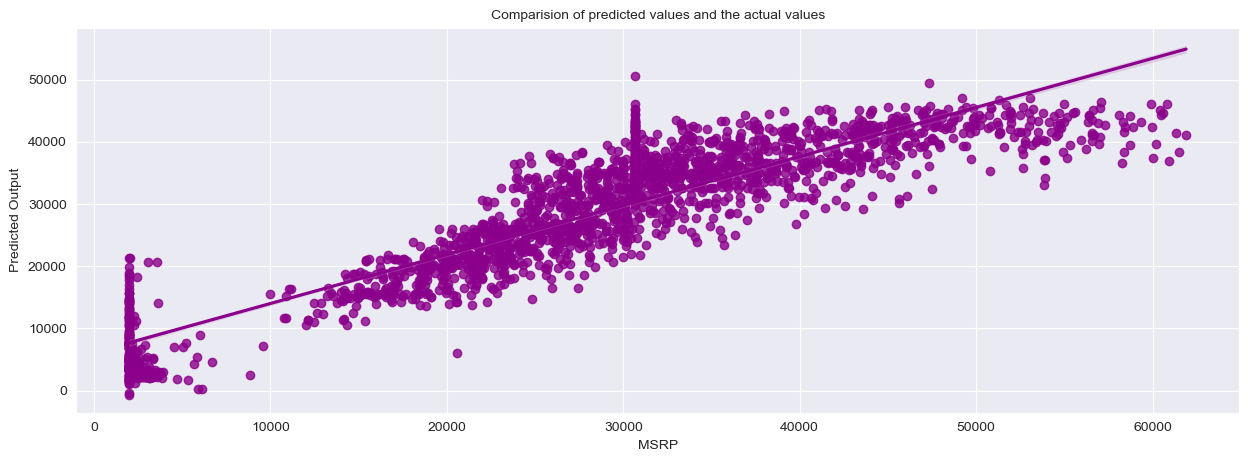

In [228]:
plt.figure(figsize = (15, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkmagenta', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 10)
plt.show()

In [230]:
from sklearn.ensemble import RandomForestRegressor
model_Rf=RandomForestRegressor()
model_Rf.fit(X_train,y_train)
y_predict_Rf = model_Rf.predict(X_test)

In [231]:
model_Rf.score(X_test,y_test)

0.9239879527652334

In [272]:
mse_RF_reg = mean_squared_error(y_test, y_predict_Rf)
R2_RF_reg = r2_score(y_test, y_predict_Rf)
mae_RF_reg = mean_absolute_error(y_test, y_predict_Rf)
print("Mean squared error of RF regression: ", mse_RF_reg)
print("R2_score of linear regression: ", R2_RF_reg)
print("Mean absolute error of RF regression: ", mae_RF_reg)

Mean squared error of RF regression:  13891150.18396538
R2_score of linear regression:  0.9239879527652334
Mean absolute error of RF regression:  2234.577464018273


Tried the model with Random Forest Regressor, which is having more accuracy of around 92%. 
Hence we can finalise this model for this Machine Learning Algorithm model.

In [232]:
y_predict_Rf = pd.DataFrame(y_predict_Rf, columns = ['Predicted Output'])
results = pd.concat([y_predict_Rf, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

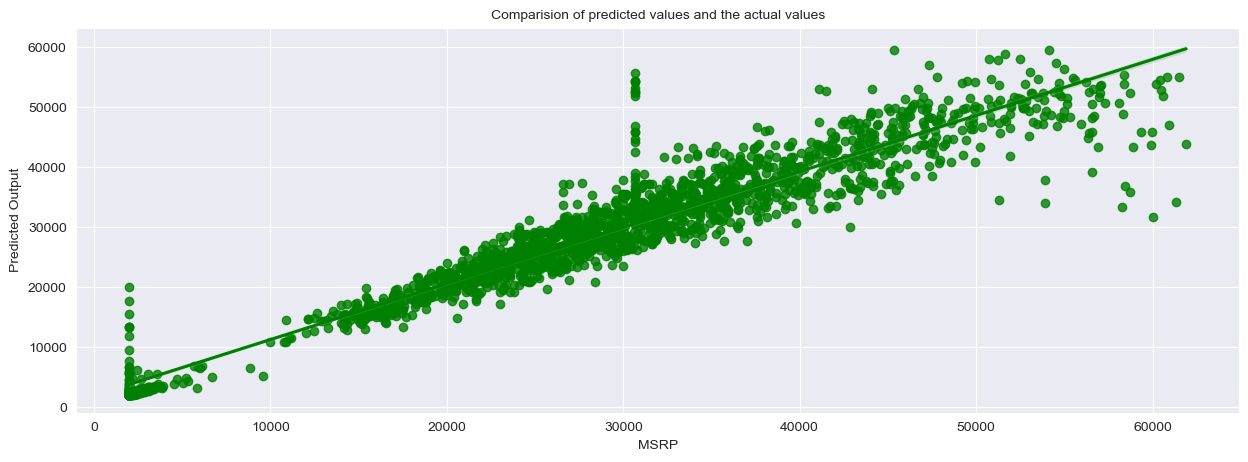

In [233]:
plt.figure(figsize = (15, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'green', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 10)
plt.show()

In [ ]:
#Hyperparameter Tuning for RandomRegressor

In [258]:
from sklearn.model_selection import RandomizedSearchCV

#n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
n_estimators =[100,150,250]
max_features = ['auto', 'sqrt','log2']
#max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]


random_grid = {
               #'n_estimators':n_estimators,
               'n_estimators':10,
               'max_features': max_features,
               #'max_depth': max_depth,
               #'max_depth': None,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}

In [268]:
from sklearn.model_selection import RandomizedSearchCV
rf= RandomForestRegressor()
RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=100, cv=3,verbose=2,random_state=100,n_jobs=-1)
#rf_randomcv=RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=100, cv=3,verbose=2,random_state=100,n_jobs=-1)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': 10},
                   random_state=100, verbose=2)

In [270]:
#rf_randomcv.fit(X_train,y_train)

In [244]:
#rf_randomcv.best_params_

In [ ]:
#Pred=rf_randomcv.predict(X_test)
#accuracy_score(Y_test,Pred)

In [ ]:
#Due to performance issues not able to apply the above hyper-parameter tuning to algorithm